In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d brendan45774/test-file

test-file.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip test-file.zip

Archive:  test-file.zip
  inflating: tested.csv              


In [ ]:
!cat<tested.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q
895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S
897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S
898,1,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q
899,0,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S
900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C
901,0,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S
902,0,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S
903,0,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S
904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S
905,0,2,"Howard, Mr. Benjamin",male,63,1,0,240

In [ ]:
pip install pandas


In [ ]:
!pip install matplotlib-venn

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
path = '/content/drive/MyDrive/Kaggle/test-file.zip'
data = pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Cleaning Dataset

In [ ]:
data.drop(columns = ["PassengerId", "Ticket", "Name"], inplace = True)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


#Encode Categorical Variables In The Dataset

In [ ]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [ ]:
pd.get_dummies(data['Sex'], drop_first = True)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
pd.get_dummies(data['Sex'], drop_first = True,prefix_sep= '_',prefix='Sex' )

,Sex_male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
encoded_Sex = pd.get_dummies(data['Sex'], drop_first = True,prefix_sep= '_',prefix='Sex' )
pd.concat((data, encoded_Sex), axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,male,34.5,0,0,7.8292,NaN,Q,1
1,1,3,female,47.0,1,0,7.0000,NaN,S,0
2,0,2,male,62.0,0,0,9.6875,NaN,Q,1
3,0,3,male,27.0,0,0,8.6625,NaN,S,1
4,1,3,female,22.0,1,1,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S,1
414,1,1,female,39.0,0,0,108.9000,C105,C,0
415,0,3,male,38.5,0,0,7.2500,NaN,S,1
416,0,3,male,NaN,0,0,8.0500,NaN,S,1


In [ ]:
data = pd.concat((data, encoded_Sex), axis=1)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,male,34.5,0,0,7.8292,NaN,Q,1
1,1,3,female,47.0,1,0,7.0000,NaN,S,0
2,0,2,male,62.0,0,0,9.6875,NaN,Q,1
3,0,3,male,27.0,0,0,8.6625,NaN,S,1
4,1,3,female,22.0,1,1,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S,1
414,1,1,female,39.0,0,0,108.9000,C105,C,0
415,0,3,male,38.5,0,0,7.2500,NaN,S,1
416,0,3,male,NaN,0,0,8.0500,NaN,S,1


In [ ]:
data.drop(columns = 'Sex', inplace = True)

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,34.5,0,0,7.8292,NaN,Q,1
1,1,3,47.0,1,0,7.0000,NaN,S,0
2,0,2,62.0,0,0,9.6875,NaN,Q,1
3,0,3,27.0,0,0,8.6625,NaN,S,1
4,1,3,22.0,1,1,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,NaN,S,1
414,1,1,39.0,0,0,108.9000,C105,C,0
415,0,3,38.5,0,0,7.2500,NaN,S,1
416,0,3,NaN,0,0,8.0500,NaN,S,1


In [ ]:
data['Embarked'].unique()     #The Modes Of Embarked

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
pd.get_dummies(data['Embarked'], prefix='Embarked', prefix_sep='_')

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [ ]:
pd.get_dummies(data['Embarked'], prefix='Embarked', prefix_sep='_',drop_first='True')

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [ ]:
encoded_mbarked = pd.get_dummies(data['Embarked'], prefix='Embarked', prefix_sep='_',drop_first='True')
data = pd.concat((data, encoded_mbarked), axis=1)
data.drop(columns=['Embarked'], inplace = True)

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,NaN,1,1,0
1,1,3,47.0,1,0,7.0000,NaN,0,0,1
2,0,2,62.0,0,0,9.6875,NaN,1,1,0
3,0,3,27.0,0,0,8.6625,NaN,1,0,1
4,1,3,22.0,1,1,12.2875,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,NaN,1,0,1
414,1,1,39.0,0,0,108.9000,C105,0,0,0
415,0,3,38.5,0,0,7.2500,NaN,1,0,1
416,0,3,NaN,0,0,8.0500,NaN,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Cabin       91 non-null     object 
 7   Sex_male    418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 24.2+ KB


In [ ]:
data.drop(columns=['Cabin'], inplace = True)  # Because is Missing Data Too much and we have it 91 out 418

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,NaN,0,0,8.0500,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Sex_male    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [ ]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
data.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
413    1
414    0
415    0
416    1
417    1
Length: 418, dtype: int64

In [ ]:
data.isna().sum(axis=1) > 1

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
from sklearn.impute import KNNImputer

OSError: ignored

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer

In [ ]:
ages_befor_imputation = data["Age"].to_numpy()

In [ ]:
data.to_numpy()

array([[892, 0, 3, ..., 7.8292, nan, 'Q'],
       [893, 1, 3, ..., 7.0, nan, 'S'],
       [894, 0, 2, ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 0, 3, ..., 7.25, nan, 'S'],
       [1308, 0, 3, ..., 8.05, nan, 'S'],
       [1309, 0, 3, ..., 22.3583, nan, 'C']], dtype=object)

In [ ]:
data_array = data.to_numpy()

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
import re

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# imputer = KNNImputer(n_neighbors=5, weights='distance')

# imputed_data_array = imputer.fit_transform(data_array)

imputer = KNNImputer(n_neighbors=5, weights="distance")

imputed_data_array = imputer.fit_transform(data_array)


ValueError: ignored

In [ ]:
ages_after_imputation = data["Age"].to_numpy()

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

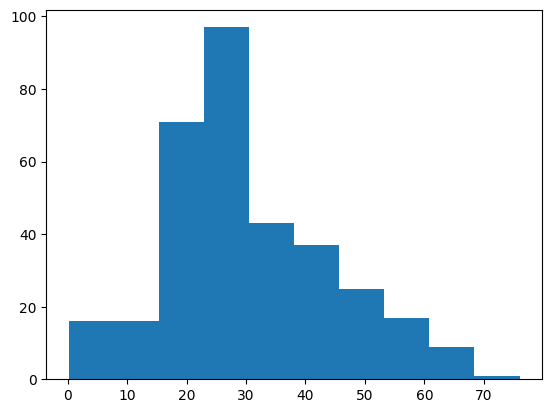

In [ ]:
fig, ax = plt.subplots()

ax.hist(ages_befor_imputation)

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

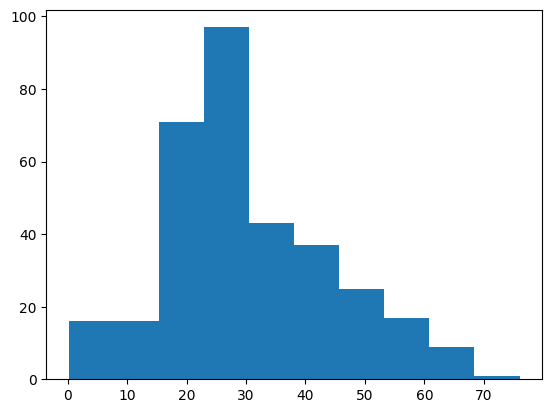

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

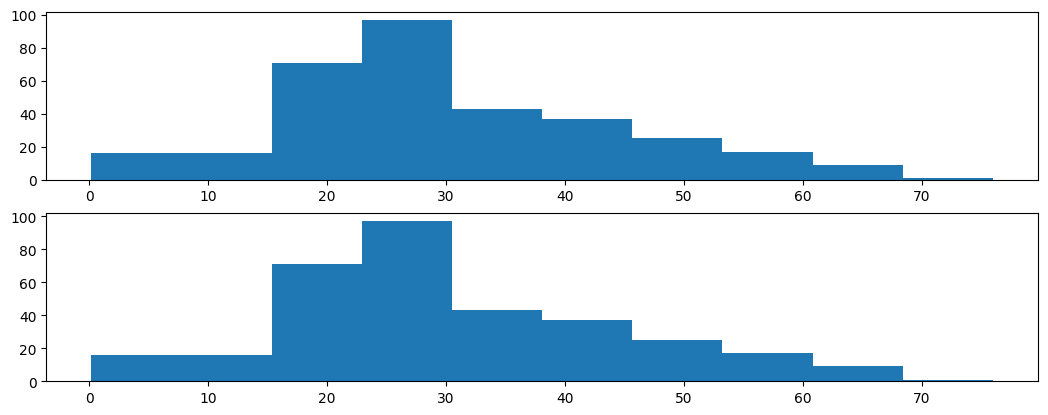

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize =(6.4*2, 4.8))

ax[0].hist(ages_befor_imputation)
ax[1].hist(ages_after_imputation)